### This Lab is open from 10/27 at 12:01 am to 10/29 at 11:59 pm.  Each problem is 10 points.

We will use Iris data found here https://archive.ics.uci.edu/ml/datasets/Iris. It is one of the most used data sets in Data Science. You can just google or read more about it here https://en.wikipedia.org/wiki/Iris_flower_data_set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#Read in the IRIS data
#Note there are three unique species labels
iris = pd.read_csv('IRIS-1.csv')

## Problem 1
Use the CART algorithm to fit a decision tree model to predict species. Use all 4 remaining columns as predictors in your model. Report the accuracy score and the confusion matrix.

In [4]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [22]:
from sklearn import tree
tree = tree.export_text(cart)
print(tree)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



[Text(133.92000000000002, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 54.359999999999985, 'X[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.840000000000

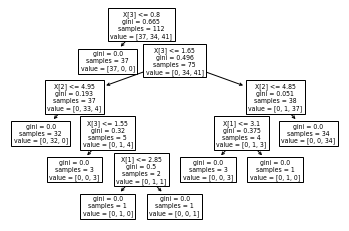

In [23]:
from sklearn import tree
tree.plot_tree(cart)

In [24]:
trainpred = cart.predict(xtrain)
confusion_matrix(ytrain, trainpred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [25]:
metrics.accuracy_score(ytrain, trainpred)

1.0

In [26]:
testpred = cart.predict(xtest)
confusion_matrix(ytest, testpred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [27]:
metrics.accuracy_score(ytest, testpred)

0.9736842105263158

## Problem 2

Fit a random forest model with 50 estimators to predict species using the 4 remaining columns as predictors.  Report the confusion matrix and accuracy of your model.

In [28]:
rfmodel = RandomForestClassifier(n_estimators = 50, bootstrap = True)
rfmodel.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=50)

In [29]:
ytrainpred = rfmodel.predict(xtrain)
ytestpred = rfmodel.predict(xtest)

In [30]:
metrics.accuracy_score(ytrain, ytrainpred)

1.0

In [31]:
confusion_matrix(ytrain, ytrainpred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [32]:
metrics.accuracy_score(ytest, ytestpred)

0.9736842105263158

In [33]:
confusion_matrix(ytest, ytestpred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

## Problem 3

Plot the decision tree from Problem 1 and plot the first decision tree from your random forest in Problem 2.  Write a few sentences to interpret and compare the plots and comment on the meaning of your predictors.

In [38]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [34]:
xx = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, random_state = 1)
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

DecisionTreeClassifier()

## Problem 4

Divide the data into training (80%) and testing (20%). Fit both a decision tree and a random forest model to the training data.  Report your accuracy and confusion matrix for both models with respect to training data.

## Problem 5

Use both of your models from problem 4 to predict on the test data.  Plot a colored confusion matrix and report the accuracy for both of your predictions.  Make sure to label your results clearly.  Write a few sentences to compare the results and discuss which is the better model.  Explain your reasoning.